# Name : Devasy Patel
## Roll No : 20BCE057
### Date : 27/03/2023


# Practical 7 : Implement a Web crawler using simple queue data structure.



In [1]:
import requests
from bs4 import BeautifulSoup
from collections import deque

def crawl(start_url):
    visited = set()
    queue = deque([(start_url, 0)])
    tree = {}
     
    
    while queue:
        url, depth = queue.popleft()
        tree[url] = []
        if depth > 3:
            print('Max depth reached')
            return tree
        if url not in visited:
            visited.add(url)
            print(f'Visiting: {url}')
            try:
                response = requests.get(url)
                soup = BeautifulSoup(response.text, 'html.parser')
                for link in soup.find_all('a'):
                    href = link.get('href')
                    if href and href.startswith('http'):
                        tree[url].append(href)
                        queue.append((href, depth + 1))
            except KeyboardInterrupt:
                return tree
            except:
                pass      
        
    return tree
            
# tree = crawl('https://www.isro.gov.in/')
tree = crawl('https://www.salesmate.io/blog/')


Visiting: https://www.salesmate.io/blog/
Visiting: https://www.youtube.com/channel/UCZPKrO3O06QWrlhBl9Q7E5w
Visiting: https://support.salesmate.io/
Visiting: https://accounts.salesmate.io/login/#/
Visiting: https://accounts.salesmate.io/registration/#/
Visiting: https://www.salesmate.io/blog/category/sales/
Visiting: https://www.salesmate.io/blog/category/marketing/
Visiting: https://www.salesmate.io/blog/category/support/
Visiting: https://www.salesmate.io/blog/category/customer-experience/
Visiting: https://www.salesmate.io/blog/category/product-updates/
Visiting: https://www.salesmate.io/blog/category/company-news/
Visiting: https://www.salesmate.io/blog/category/consulting/
Visiting: https://www.salesmate.io/blog/best-crm-for-consulting-business/
Visiting: https://www.salesmate.io/blog/author/sonali-negi/
Visiting: https://www.salesmate.io/blog/category/sales/sales-pipeline/
Visiting: https://www.salesmate.io/blog/category/uncategorized/
Visiting: https://www.salesmate.io/blog/cons

In [24]:
# function to find the height of the tree of urls
def find_height(tree, start_url):
    height = 0
    queue = deque([(start_url, 0)])
    visited = set()
    while queue:
        url, h = queue.popleft()
        if url not in visited:
            visited.add(url)
            height = max(height, h)
            for link in tree[url]:
                queue.append((link, h+1))
    return height
# find_height(tree, 'https://www.isro.gov.in/')

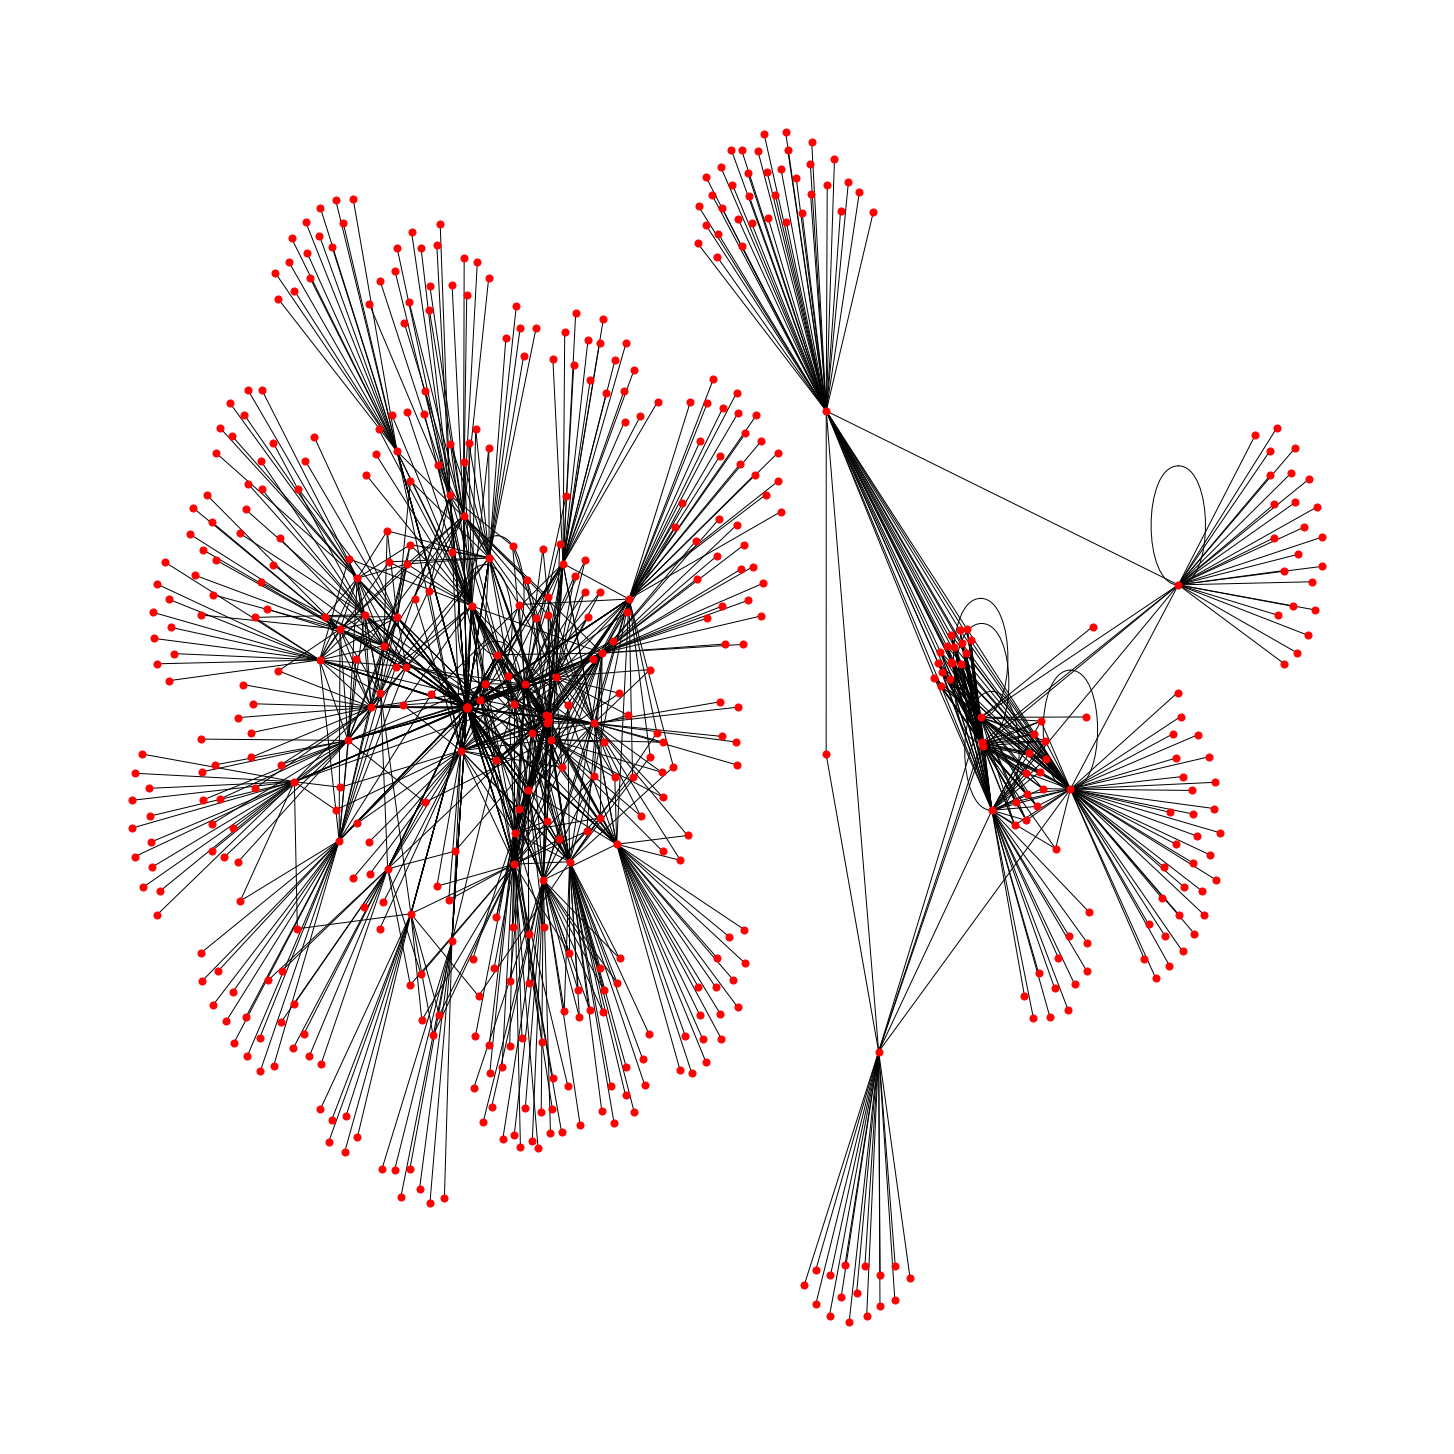

In [2]:
# plto the tree
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
G = nx.Graph()
for parent, children in tree.items():
    for child in children:
        G.add_edge(parent, child)


nx.draw(G, node_size=50, node_color='red', font_size=8)
plt.show()
# show the tree in larger scale

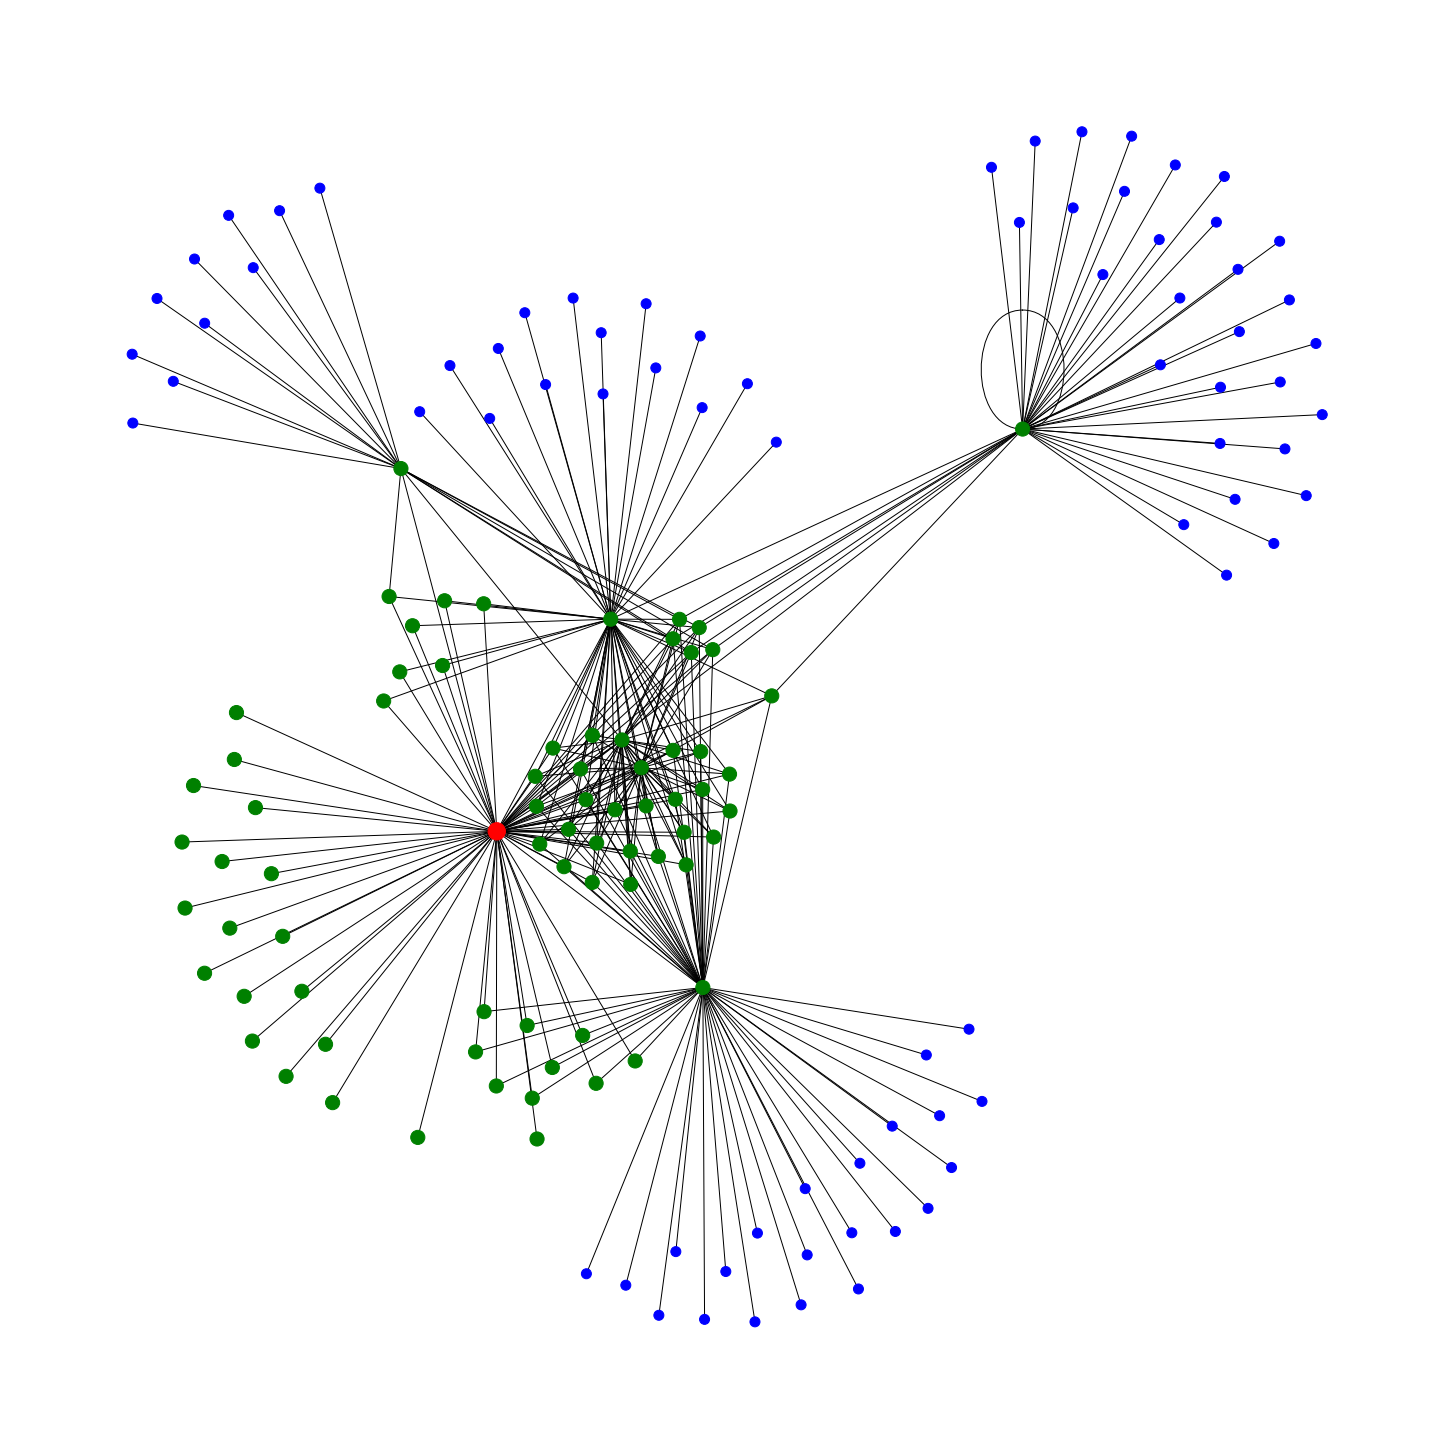

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_tree(tree, start_url):
    G = nx.Graph()
    colors = []
    sizes = []
    for parent, children in tree.items():
        for child in children:
            G.add_edge(parent, child)
    for node in G.nodes:
        if node == start_url:
            colors.append('red')
            sizes.append(300)
        else:
            try:
                depth = nx.shortest_path_length(G, start_url, node)
                if depth == 1:
                    colors.append('green')
                    sizes.append(200)
                elif depth == 2:
                    colors.append('blue')
                    sizes.append(100)
                elif depth == 3:
                    colors.append('yellow')
                    sizes.append(50)
            except nx.NetworkXNoPath:
                # Assign a default color and size to nodes that are not reachable from the start_url
                colors.append('gray')
                sizes.append(25)
    plt.figure(figsize=(20,20))
    nx.draw(G, node_color=colors, node_size=sizes, font_size=8)
    plt.show()

plot_tree(tree, 'https://www.nirmauni.ac.in/')

In [28]:
import plotly.graph_objs as go
import networkx as nx

def plot_tree_with_plotly(tree):
    G = nx.Graph()
    for parent, children in tree.items():
        for child in children:
            G.add_edge(parent, child)
    pos = nx.spring_layout(G)
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=False,
            color='red',
            size=10,
            line_width=2))
    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    fig.show()
    
plot_tree_with_plotly(tree)

In [29]:
import requests
from bs4 import BeautifulSoup
from collections import deque
from urllib.parse import urlparse, urljoin
from urllib.robotparser import RobotFileParser

def polite_crawl(start_url):
    visited = set()
    queue = deque([start_url])
    tree = {}
    rp = RobotFileParser()
    
    while queue:
        url = queue.popleft()
        tree[url] = []
        if url not in visited:
            visited.add(url)
            print(f'Visiting: {url}')
            try:
                # Check robots.txt for politeness
                parsed_url = urlparse(url)
                base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
                rp.set_url(urljoin(base_url, '/robots.txt'))
                rp.read()
                if not rp.can_fetch('*', url):
                    print(f"Not allowed to crawl {url} due to robots.txt restrictions")
                    continue
                
                response = requests.get(url)
                soup = BeautifulSoup(response.text, 'html.parser')
                for link in soup.find_all('a'):
                    href = link.get('href')
                    if href and href.startswith('http'):
                        tree[url].append(href)
                        queue.append(href)
            except:
                pass
    return tree

tree = polite_crawl('https://www.nirmauni.ac.in/')

Visiting: https://www.nirmauni.ac.in/
Visiting: https://nirmauni.ac.in
Visiting: https://nirmauni.ac.in/admissions-aid/
Visiting: https://nirmauni.ac.in/academics/
Visiting: https://nirmauni.ac.in/campus-life/
Visiting: https://nirmauni.ac.in/research-at-nirma/
Visiting: https://nirmauni.ac.in/placement/
Visiting: https://nirmauni.ac.in/alumni/
Visiting: https://nirmauni.ac.in/about/
Visiting: https://nirmauni.ac.in/announcement/phd-admissions-2023-24/
Visiting: https://www.facebook.com/sharer/sharer.php?u=https://fdsr.nirmauni.ac.in/admission-aid/doctor-of-philosophy/phd-admission-page/
Not allowed to crawl https://www.facebook.com/sharer/sharer.php?u=https://fdsr.nirmauni.ac.in/admission-aid/doctor-of-philosophy/phd-admission-page/ due to robots.txt restrictions
Visiting: https://twitter.com/home?status=https://fdsr.nirmauni.ac.in/admission-aid/doctor-of-philosophy/phd-admission-page/
Visiting: https://fdsr.nirmauni.ac.in/admission-aid/doctor-of-philosophy/phd-admission-page/
Not all